## Data Processing

In [41]:
import pandas as pd

file_path = 'ggr.csv'
data = pd.read_csv(file_path)

data.head()

,date,ggr
0,2020-04-28,6794.93
1,2020-04-29,-5322.08
2,2020-04-30,16727.25
3,2020-05-01,22032.02
4,2020-05-02,25210.06


In [43]:
data['date'] = pd.to_datetime(data['date'])
data['ggr'] = data['ggr'] - min(data['ggr'])

missing_values = data.isnull().sum()

missing_values

date    0
ggr     0
dtype: int64

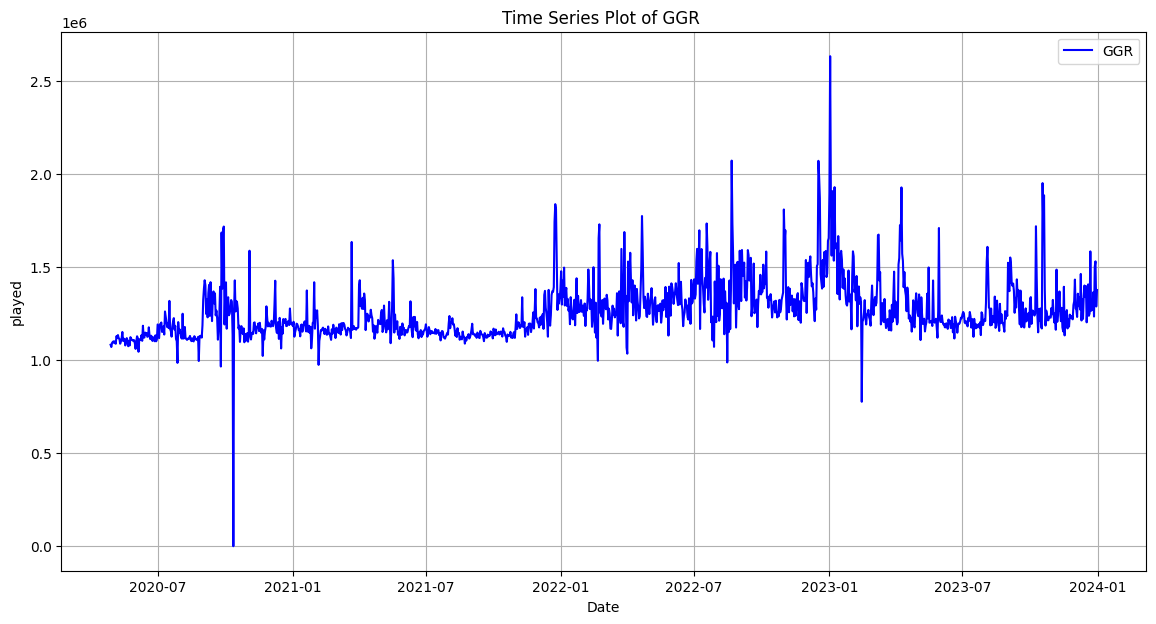

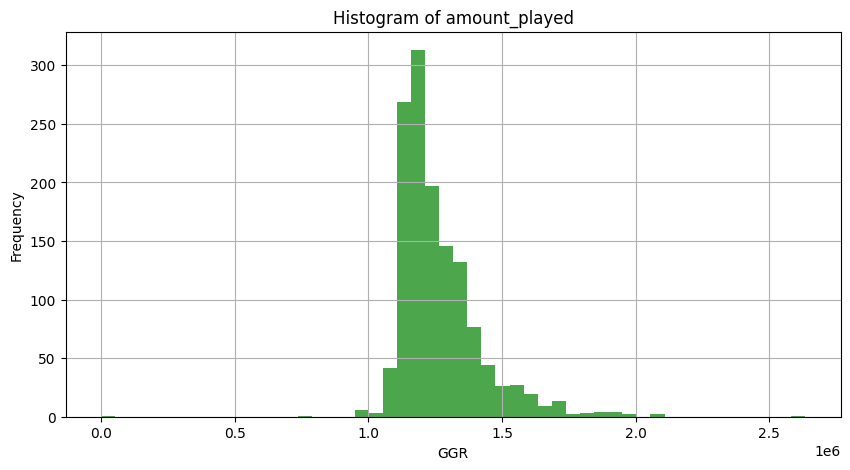

In [44]:
import matplotlib.pyplot as plt


# Line plot of the time series
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['ggr'], label='GGR', color='blue')
plt.title('Time Series Plot of GGR ')
plt.xlabel('Date')
plt.ylabel('played')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of the 'ggr' values
plt.figure(figsize=(10, 5))
plt.hist(data['ggr'], bins=50, color='green', alpha=0.7)
plt.title('Histogram of amount_played')
plt.xlabel('GGR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Features Addition

In [45]:
import holidays
from datetime import timedelta


# Public holidays
gr_holidays = holidays.Greece(years=[2020, 2021, 2022, 2023, 2024])
data['holiday'] = [1 if date in gr_holidays else 0 for date in data['date']]

holiday_dates = set(gr_holidays.keys())
expanded_holidays = [date + timedelta(days=offset) for date in holiday_dates for offset in (-2, -1, 0, 1, 2)]

data['holiday'] = [1 if date in pd.to_datetime(expanded_holidays) else 0 for date in data['date']]

# Day of the week and month of year 
data['day_of_week'] = data['date'].dt.dayofweek + 1 
data['month_of_year'] = data['date'].dt.month   
data['day_of_month'] = data['date'].dt.day        

# Simple exponential smoothing with a common alpha (0.1)
alpha = 0.1
data_smoothed = data['ggr'].ewm(alpha=alpha, adjust=False).mean()
data['exp_smoothed'] = data_smoothed.shift(30)

data.set_index('date', inplace=True)

data.head(35) 

,ggr,holiday,day_of_week,month_of_year,day_of_month,exp_smoothed
date,,,,,,
2020-04-28,1083429.81,0,2,4,28,NaN
2020-04-29,1071312.80,1,3,4,29,NaN
2020-04-30,1093362.13,1,4,4,30,NaN
2020-05-01,1098666.90,1,5,5,1,NaN
2020-05-02,1101844.94,1,6,5,2,NaN
2020-05-03,1091930.51,1,7,5,3,NaN
2020-05-04,1101796.73,0,1,5,4,NaN
2020-05-05,1088590.55,0,2,5,5,NaN
2020-05-06,1129729.40,0,3,5,6,NaN


In [524]:
data.to_csv('data.csv')

In [525]:
start_date = max(data.index) + timedelta(days=1)

dates = pd.date_range(start=start_date, periods=30, freq='D')

out_features = pd.DataFrame()
out_features['date'] = dates

out_features['holiday'] = [1 if date in pd.to_datetime(expanded_holidays) else 0 for date in out_features['date']]
out_features['day_of_week'] = out_features['date'].dt.dayofweek + 1 
out_features['month_of_year'] = out_features['date'].dt.month   
out_features['day_of_month'] = out_features['date'].dt.day  
out_features['exp_smoothed'] = data_smoothed[-30:].values

out_features.set_index('date', inplace=True)

out_features.head() 

,holiday,day_of_week,month_of_year,day_of_month,exp_smoothed
date,,,,,
2024-01-01,1,1,1,1,1.268323e+06
2024-01-02,1,2,1,2,1.268523e+06
2024-01-03,1,3,1,3,1.264976e+06
2024-01-04,1,4,1,4,1.274272e+06
2024-01-05,1,5,1,5,1.275948e+06


In [292]:
out_features.to_csv('out_features.csv')

## Stationarity check

In [372]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test for stationarity
adf_test = adfuller(data['ggr'])
adf_output = {
    'Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}

adf_output


{'Test Statistic': -4.114478075307853,
 'p-value': 0.0009165100778449107,
 'Lags Used': 14,
 'Number of Observations Used': 1328,
 'Critical Values': {'1%': -3.435283723720563,
  '5%': -2.8637188486120326,
  '10%': -2.567930026514189}}

The test statistics value (-4.05) is less than the critical values (-3.44,-2.87,-2.57) at different percentage. In this case, we can reject our null hypothesis conclude that our data is stationary.

## Seasonality and trend

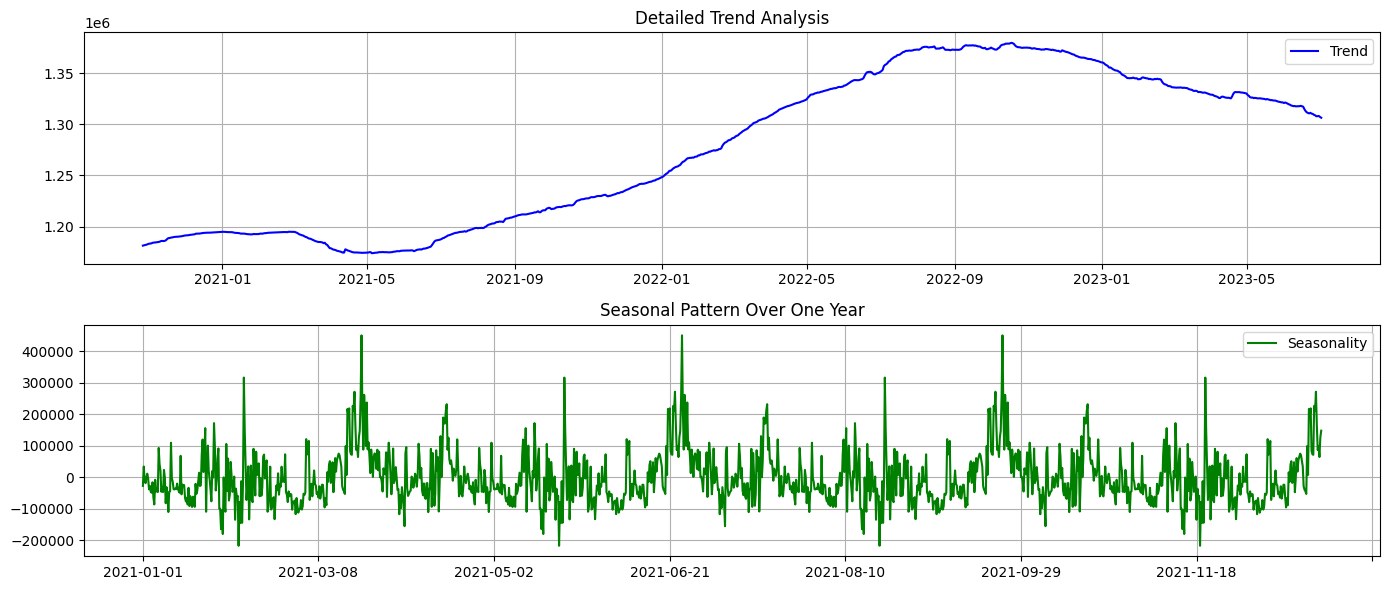

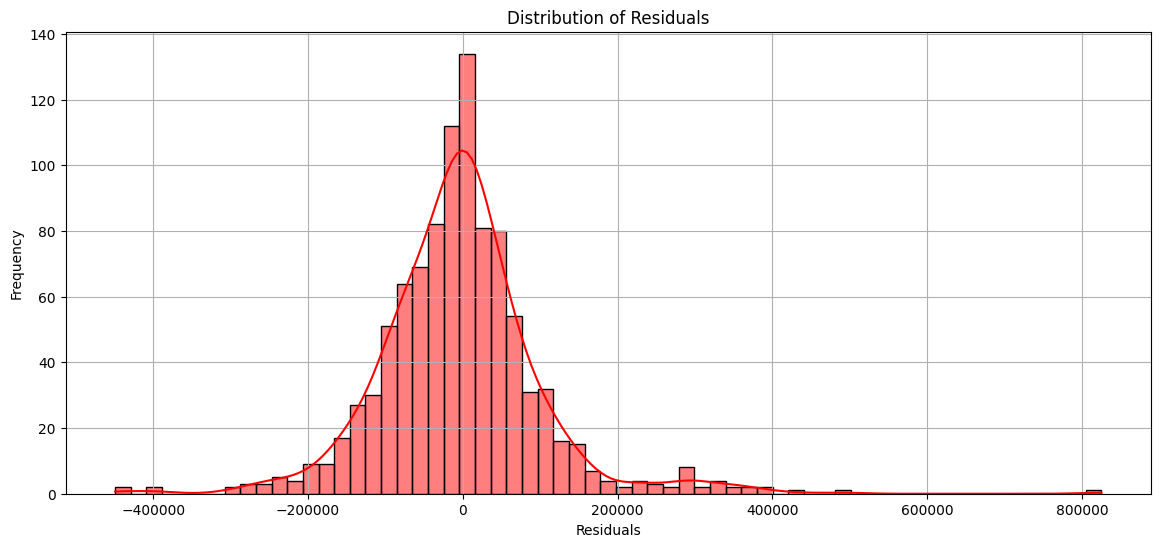

In [24]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

decomposition = seasonal_decompose(data['ggr'], model='additive', period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# the detailed trend component
plt.figure(figsize=(14, 6))
plt.subplot(211)
plt.plot(trend, label='Trend', color='blue')
plt.grid(True)
plt.title('Detailed Trend Analysis')
plt.legend()

# the seasonal component for one year to see the detailed seasonal pattern
plt.subplot(212)
plt.plot(np.arange(0, len(seasonal)), seasonal, label='Seasonality', color='green')
plt.title('Seasonal Pattern Over One Year')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

# Statistical analysis of residuals
residual.dropna(inplace=True) 
plt.figure(figsize=(14, 6))
sns.histplot(residual, kde=True, color='red')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Trend Analysis**
The detailed plot of the trend component shows how the time series' overall direction has shifted over time, with apparent fluctuations that could correspond to underlying economic conditions or market changes.

**Seasonal Analysis**
The plot of the seasonal component over one year highlights specific patterns of peaks and troughs. Understanding these can aid in forecasting, as it provides a clear view of when to expect rises or drops in activity, which are consistent annually.

**Residual Analysis**
The histogram of the residuals shows that the data points are nearly normally distributed, as indicated by the skewness and the presence of outliers.

In [13]:
from scipy.stats import kstest


mean = np.mean(residual)
std = np.std(residual)

#perform Kolmogorov-Smirnov test for normality of residuals
kstest(residual, 'norm', args=(mean, std))

KstestResult(statistic=0.08894014687947316, pvalue=3.453996597500997e-07, statistic_location=60099.1753169323, statistic_sign=1)

From the output we can see that the test statistic is 0.089 and the corresponding p-value is 3.453996597500997e-07.

Since the p-value is less than .05, we don't reject the null hypothesis of the Kolmogorov-Smirnov test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

Let's trim the residuals to make them normally distributed

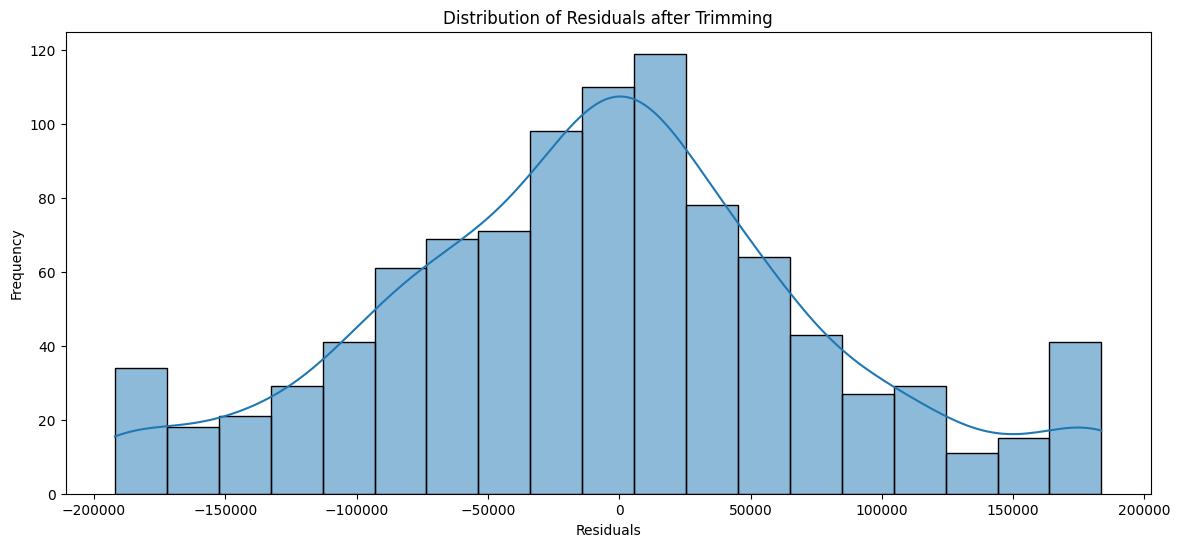

In [26]:

#  Calculate mean and standard deviation of the residuals
mean_res = residual.mean()
std_res = residual.std()

# Set a threshold at 1.8 standard deviations from the mean
upper_limit = mean_res + 1.8 * std_res
lower_limit = mean_res - 1.8 * std_res

# Cap values exceeding the threshold
trimmed_res = residual.copy()
trimmed_res = trimmed_res.clip(lower=lower_limit, upper=upper_limit)

# Replotting the distribution after trimming
plt.figure(figsize=(14, 6))
sns.histplot(trimmed_res, kde=True)
plt.title('Distribution of Residuals after Trimming')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [27]:
from scipy import stats

residual_trimmed = trimmed_res.dropna()
mean = np.mean(residual_trimmed)
std = np.std(residual_trimmed)

#perform Kolmogorov-Smirnov test for normality of residuals
kstest(residual_trimmed, stats.norm.cdf, args=(mean, std))

KstestResult(statistic=0.0374015682017923, pvalue=0.12602500791146454, statistic_location=17846.86768679545, statistic_sign=1)

Now p-value is equall 0.13, which is bigger than our confidence interval. So, we can suggest that these residuals are normally distributed

# ExponentialSmoothing model

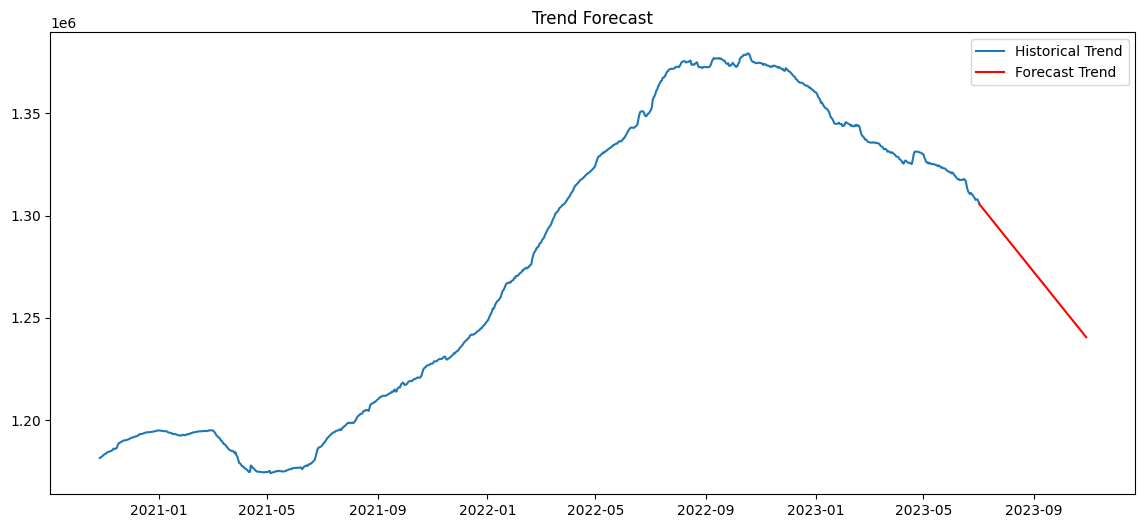

2023-07-03    1.305778e+06
2023-07-04    1.305230e+06
2023-07-05    1.304682e+06
2023-07-06    1.304134e+06
2023-07-07    1.303587e+06
Freq: D, dtype: float64

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

trend_data = trend.dropna()

# Setting up the ExponentialSmoothing model
model = ExponentialSmoothing(trend_data, trend="add", seasonal=None, damped_trend=False)

fitted_model = model.fit()

forecast_period = 120
forecast = fitted_model.forecast(forecast_period)
forecast_dates = pd.date_range(start=trend_data.index[-1], periods=120, freq='D').to_numpy()


plt.figure(figsize=(14, 6))
plt.plot(trend_data, label='Historical Trend')
plt.plot(forecast_dates, forecast, label='Forecast Trend', color='red')
plt.title('Trend Forecast')
plt.legend()
plt.show()

forecast.head()


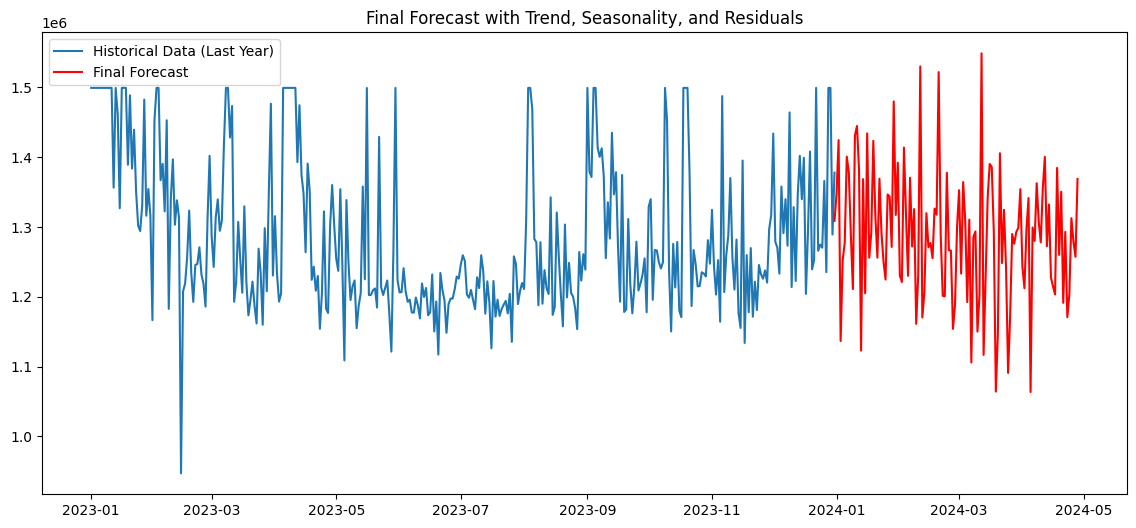

In [33]:
# Re-forecasting the seasonal component for the forecast period
last_seasonal_cycle = result.seasonal[-seasonal_period:]

# Replicate the last seasonal cycle to match the forecast horizon
forecast_seasonal = pd.concat([last_seasonal_cycle]*int(forecast_period/seasonal_period), ignore_index=True)[:forecast_period]

# Generating random residuals with the same statistical properties as the historical residuals
historical_residuals = result.resid.dropna()
residual_mean = historical_residuals.mean()
residual_std = historical_residuals.std()
forecast_residuals = np.random.normal(residual_mean, residual_std, forecast_period)

final_forecast = forecast.values + forecast_seasonal.values + forecast_residuals

plt.figure(figsize=(14, 6))
plt.plot(trimmed_data.index[-365:], trimmed_data['ggr'][-365:], label='Historical Data (Last Year)')
plt.plot(pd.date_range(trimmed_data.index[-1], periods=forecast_period, freq='D'), final_forecast, label='Final Forecast', color='red')
plt.title('Final Forecast with Trend, Seasonality, and Residuals')
plt.legend()
plt.show()

# Evaluation of the simple forecasting technique

MAPE: 16.79%


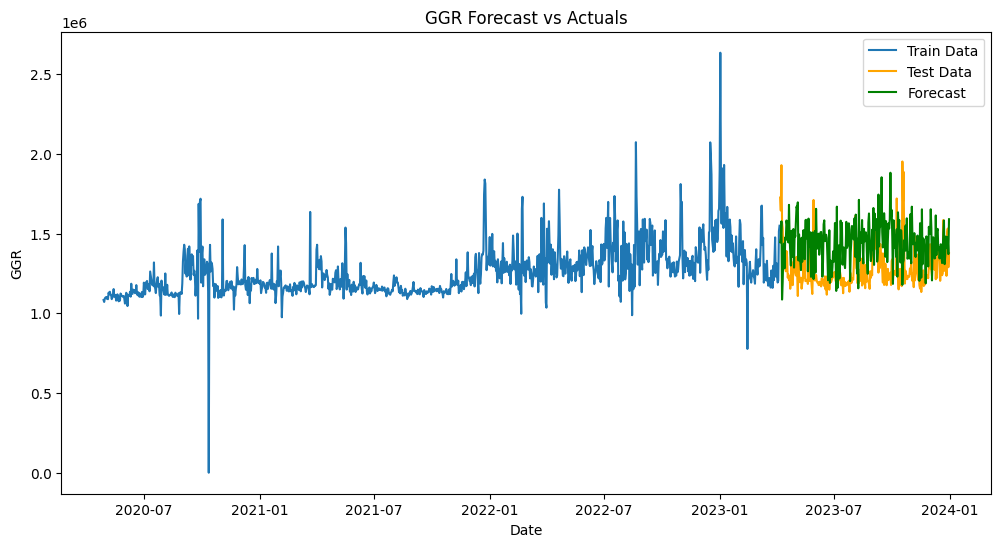

In [46]:
# Calculate the Mean Absolute Percentage Error (MAPE) on the training data
train_cut = int(len(data) * 0.8)
train_data = data.iloc[:train_cut, :]
test_data = data.iloc[train_cut:]

result = seasonal_decompose(train_data['ggr'], model='additive', period=seasonal_period)

trend_train_data = result.trend.dropna()

model = ExponentialSmoothing(trend_train_data, trend="add", seasonal=None, damped_trend=False)
fitted_model = model.fit()

train_trend_forecast = fitted_model.forecast(len(test_data))

last_seasonal_cycle = result.seasonal[-seasonal_period-15:]
forecast_seasonal = pd.concat([last_seasonal_cycle]*int(len(train_trend_forecast)/seasonal_period), ignore_index=True)[:len(train_trend_forecast)]

residuals = result.resid.dropna()
forecast_residuals = np.random.normal(residuals.mean(), residuals.std(), len(test_data))

train_forecast = train_trend_forecast.values + forecast_seasonal.values + forecast_residuals

# Calculate MAPE
mape = np.mean(np.abs((test_data['ggr'] - train_forecast) / test_data['ggr'])) * 100
print(f'MAPE: {round(mape, 2)}%')

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['ggr'], label='Train Data')
plt.plot(test_data.index, test_data['ggr'], label='Test Data', color='orange')
plt.plot(test_data.index, train_forecast, label='Forecast', color='green')
plt.title('GGR Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('GGR')
plt.legend()
plt.show()

